## Beschreibung des Datensets 

Die verschiedenen Reihen der Deutschen Nationalbibliografie sowie der Neuerscheinungsdienst gliedern sich nach Sachgruppen, die auf der Dewey-Dezimalklassifikation (DDC) basieren. Ich habe das Datenset dnb:reiheO verwendet, welches Online Publikationen inkl. fertig abgeschlossener Datensätze bzw. Datensätze, die noch bearbeitet werden beinhaltet. Es handelt sich dabei um ein offenes Datenset, welches die Deutsche Nationalbibliothek über den Datenshop und eine OAI-Schnittstelle zur Verfügung stellt. Die OAI-Schnittstelle ermöglicht eine tagesgenaue Auswertung der Daten und somit kann eine Analyse der Neuerscheinungen pro Monat erfolgen. Einem Datensatz können Metadaten wie Autor, Titel, Erscheinungsjahr etc. entnommen werden. Zusätzlich werden die einzelnen Publikationen nach thematischen Kategorien sortiert. Diese Kategorien (subjects) ordnen die Publikationen den einzelnen Fachgebieten der DDC zu. Es handelt sich dabei sowohl um Neuerscheinungen des Verlagsbuchhandels als auch um Neuerscheinungen, die außerhalb des Verlagsbuchhandels erschienen sind. Hierzu zählen Monografien, Dissertationen, Periodika etc., die nur online erschienen sind.

## Fragestellung

Im Zuge der Corona-Pandemie haben sich die Anforderungen der Nutzenden an Medien geändert. Es werden mehr Online-Ressourcen benötigt, da social distancing in vielen Bereichen des Lebens eine immer größere Rolle spielt. Die folgende Analyse der Online-Publikationen stellt einen ersten Schritt zur Untersuchung dar, ob Publizierende ihr Publikationsverhalten diesen neuen Anforderungen angepasst haben. Der Untersuchungszeitraum des ersten Quartals des Jahres 2021 zeigt wie viele Gesamtpublikationen online erschienen sind und wie sich diese auf die einzelnen Kategorien verteilen. So kann in einem nächsten Schritt das Ergebnis dieser Analyse mit dem Ergebnis aus einem Jahr vor der Pandemie verglichen werden. Auf diese Weise kann ein Zusammenhang zwischen der Corona-Pandemie und dem Publikationsverhalten festgestellt werden. Anhand der Aufteilung der Publikationen in die einzelnen Kategorien kann zudem beispielsweise untersucht werden, ob sich das Publikationsverhalten einzelner Themenbereiche verändert hat.


wir befinden uns in Monat Januar
alle urls werden in einer list gespeichert
alle Webseiten ausgelesen und in eine Liste gespeichert
die Infos zusammengestellt und in einem Dictonary gespeichert
Kategorien in der Tabelle nach Namen sortiert

Januar  2021
Kategorie                                                                        Anzahl         
000 Allgemeines, Wissenschaft                                                    2              
004 Informatik                                                                   34             
020 Bibliotheks- und Informationswissenschaft                                    1              
050 Zeitschriften, fortlaufende Sammelwerke                                      7              
070 Nachrichtenmedien, Journalismus, Verlagswesen                                3              
080 Allgemeine Sammelwerke                                                       1              
100 Philosophie                                                   

alle Webseiten ausgelesen und in eine Liste gespeichert
die Infos zusammengestellt und in einem Dictonary gespeichert
Kategorien in der Tabelle nach Namen sortiert

März  2021
Kategorie                                                                        Anzahl         
000 Allgemeines, Wissenschaft                                                    17             
004 Informatik                                                                   18             
010 Bibliografien                                                                1              
020 Bibliotheks- und Informationswissenschaft                                    3              
030 Enzyklopädien                                                                9              
050 Zeitschriften, fortlaufende Sammelwerke                                      3              
070 Nachrichtenmedien, Journalismus, Verlagswesen                                1              
090 Handschriften, seltene Bücher               

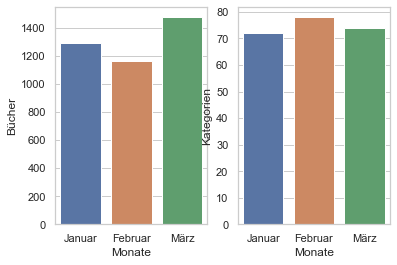

In [1]:
# Alle Links, die ich zur Recherche benutzt habe (Wikis, Foren, etc.), 
# habe ich an den entsprechenden Stellen eingefügt.
import urllib.request
import xml.etree.ElementTree as ET
from datetime import date, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# base url -> URL, die benötigt wird um auf die Informationen zuzugreifen
# Anfrage an OAI-Server der Deutschen Nationalbibliothek
site = "https://services.dnb.de/oai/repository"
# Befehl an den Server
command = "?verb=ListRecords"
# gewünschtes Format der OAI-Antwort
format = "&metadataPrefix=oai_dc"
# Festlegung des Katalogs bzw. Sets
katalog = "&set=dnb:reiheO"
# Festlegung der Monate
monate = ['Januar','Februar','März']
# Festlegung des Jahres
jahr = 2021

sammlung_anzahl_buecher_ueber_monate = {}
sammlung_anzahl_Kategorien_ueber_monate = {}


# Allgemeines zu Dictionarys und Lists
# https://www.tutorialspoint.com/python3/python_lists.htm
# https://www.tutorialspoint.com/python3/python_dictionary.htm


def alle_urls_eines_Monats(monat):
    urls = []
    # https://stackoverflow.com/questions/1060279/iterating-through-a-range-of-dates-in-python
    start_date = date(jahr, monat + 1, 1)
    end_date = date(jahr, monat + 2, 1) - timedelta(days=1)
    # stellt sicher, dass die Daten eines Monats (01.01.-31.01.) erfasst werden und 
    # nicht noch der 01.02. mit in die Schleife dazu kommt
    delta = timedelta(days=1)
    
    # https://www.python-kurs.eu/schleifen.php
    while start_date <= end_date:
        start = "&from=" + start_date.strftime("%Y-%m-%d")
        end = "&until=" + start_date.strftime("%Y-%m-%d")
        start_date += delta
        base_url = site + command + start + end + format + katalog
        urls.append(base_url)
    return urls


def oeffne_url_und_lese_webseite(urls):
    webseiten_inhalt_sammlung = []
    # https://stackoverflow.com/questions/28238713/python-xml-parsing-lxml-urllib-request
    for einzelne_url in urls:
        opener = urllib.request.build_opener()
        webseiten_inhalt = ET.parse(opener.open(einzelne_url))
        webseiten_inhalt_sammlung.append(webseiten_inhalt.getroot())
    return webseiten_inhalt_sammlung


def infos_zusammenstellen(webseiten_inhalt_sammlung):
    # https://www.tutorialspoint.com/python3/python_dictionary.htm
    tabelle = {}
    for webseiten_inhalt in webseiten_inhalt_sammlung:
        # https: // docs.python.org / 3 / library / xml.etree.elementtree.html
        for buecher in webseiten_inhalt.iter('{http://www.openarchives.org/OAI/2.0/oai_dc/}dc'):
            # https://wiki.python.org/moin/HandlingExceptions
            
            try:
                kategorie = buecher.find('{http://purl.org/dc/elements/1.1/}subject').text
                if kategorie in tabelle.keys():
                    tabelle[kategorie] = tabelle[kategorie] + 1 
                    # bei jeder bereits existierenden Kategorie wird die Anzahl um 1 erhöht
                else:
                    tabelle[kategorie] = 1
                    # bei jeder neuen Kategorie wird ein neuer Eintrag der Tabelle hinzugefügt
            except AttributeError:
                continue 
            # Falls der Key "Kategorie" nicht existiert, oder leer ist, 
            # soll mit dem nächsten Buch fortgefahren werden. 
            # Notwendig aufgrund der OAI-Anzeige
    return tabelle


def print_tabelle(tabelle_sortiert):
    print("\n" + monate[monat] + "  " + str(jahr))
    # https://stackoverflow.com/questions/17330139/python-printing-a-dictionary-as-a-horizontal-table-with-headers
    print("{:<80} {:<15}".format('Kategorie', 'Anzahl'))
    for kategory, anzahl in tabelle_sortiert.items():
        print("{:<80} {:<15}".format(kategory, anzahl))
    anzahl_kategorien = len(tabelle_sortiert)
    print("\nDie Anzahl der Kategorien für den Monat {} {}".format(monate[monat], anzahl_kategorien))
    sammlung_anzahl_Kategorien_ueber_monate[monate[monat]] = anzahl_kategorien
    anzahl_buecher = sum(tabelle_sortiert.values())
    print("Die Anzahl der erfassten Bücher {}".format(anzahl_buecher))
    sammlung_anzahl_buecher_ueber_monate[monate[monat]] = anzahl_buecher


for monat in range(len(monate)):
    print("\nwir befinden uns in Monat " + monate[monat])
    alle_urls = alle_urls_eines_Monats(monat)
    print("alle urls werden in einer list gespeichert")
    webseiten_inhalt_sammlung = oeffne_url_und_lese_webseite(alle_urls)
    print("alle Webseiten ausgelesen und in eine Liste gespeichert")
    tabelle = infos_zusammenstellen(webseiten_inhalt_sammlung)
    print("die Infos zusammengestellt und in einem Dictonary gespeichert")
    # https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
    tabelle_sortiert = dict(sorted(tabelle.items()))
    print("Kategorien in der Tabelle nach Namen sortiert")
    print_tabelle(tabelle_sortiert)

print(sammlung_anzahl_Kategorien_ueber_monate)
print(sammlung_anzahl_buecher_ueber_monate)

# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://stackoverflow.com/questions/61852402/how-can-i-plot-a-simple-plot-with-seaborn-from-a-python-dictionary
# https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
sns.set_theme(style="whitegrid")
df = pd.DataFrame()
df['Bücher'] = sammlung_anzahl_buecher_ueber_monate.values()
df['Kategorien'] = sammlung_anzahl_Kategorien_ueber_monate.values()
df['Monate'] = monate

fig, ax = plt.subplots(1, 2)
sns.barplot(y=df['Bücher'], x=df['Monate'], ax=ax[0])
sns.barplot(y=df['Kategorien'], x=df['Monate'], ax=ax[1])
plt.show()


## Diskussion

Meine Auswertungsergebnisse werden mit den Auswertungsergebnissen von Sophie Engels verglichen, die das erste Quartal 2018 als Untersuchungszeitraum gewählt hat. Dabei wird die Gesamtmenge der Publikationen verglichen und 3 ausgesuchte Kategorien (610 Medizin, Gesundheit ; 340 Recht ; K Kinder- und Jugendliteratur)
Anzahl der Gesamtpublikationen 2021 Januar: 1294, Februar: 1164, März: 1475 Gesamt: 3933

Kategorien: 610 Medizin, Gesundheit: Januar: 80, Februar: 140, März: 177 Gesamt: 397
		    340 Recht: Januar: 86, Februar: 72, März: 39 Gesamt: 197
		    K Kinder- und Jugendliteratur: Januar: 415, Februar: 232, März: 65 Gesamt: 712

Anzahl der Gesamtpublikationen 2018 Januar: 1248, Februar: 1186, März: 1336 Gesamt: 3770

Kategorien: 610 Medizin, Gesundheit: Januar: 63, Februar: 21, März: 27 Gesamt: 111
		    340 Recht: Januar: 22, Februar: 25, März: 72 Gesamt: 119
		    K Kinder- und Jugendliteratur: Januar: 50, Februar: 84, März: 104 Gesamt: 238

Es ist ein deutlicher Anstieg der Online-Publikationen im ersten Quartal 2021 gegenüber dem ersten Quartal 2018 zu verzeichnen. Auch die Verteilung auf die einzelnen Kategorien hat sich eindeutig verändert. Ob es tatsächlich um eine pandemiebedingte Entwicklung handelt müsste weiter erforscht werden.